## Introduction

The Breast Cancer (Wisconsin) Diagnosis dataset contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass.

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter);
- texture (standard deviation of gray-scale values);
- perimeter;
- area;
- smoothness (local variation in radius lengths);
- compactness (perimeter^2 / area - 1.0);
- concavity (severity of concave portions of the contour);
- concave points (number of concave portions of the contour);
- symmetry;
- fractal dimension (“coastline approximation” - 1).

## Importing packages and loading data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("data/data-breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# dropping id, Unnamed 32 column
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


B    357
M    212
Name: diagnosis, dtype: int64


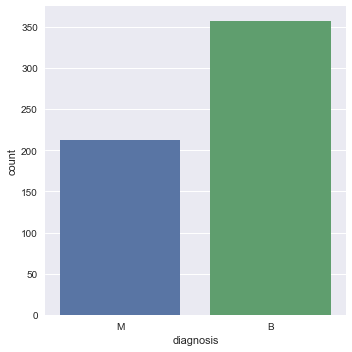

In [10]:
print(df['diagnosis'].value_counts())
sns.factorplot('diagnosis',data=df,kind='count');

In [14]:
for col in df.columns:
    if col.endswith('_mean'):
        print(col)

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean


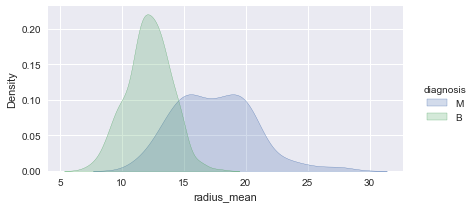

In [18]:
sns.FacetGrid(df,hue='diagnosis',aspect=2,margin_titles=True).map(sns.kdeplot,'radius_mean',shade=True).add_legend();

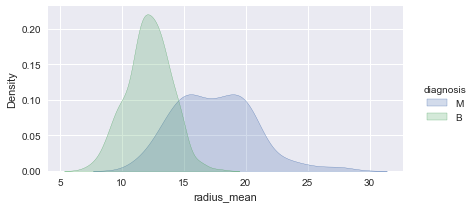

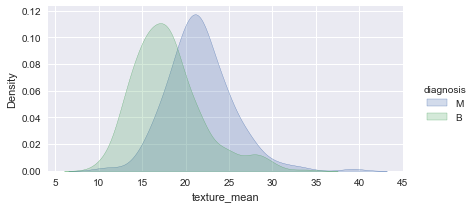

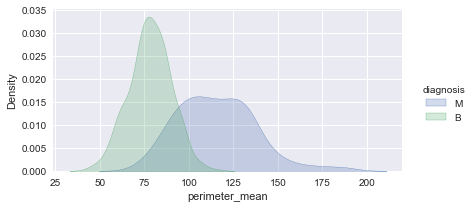

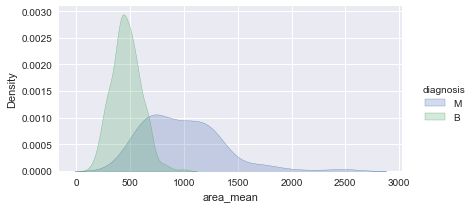

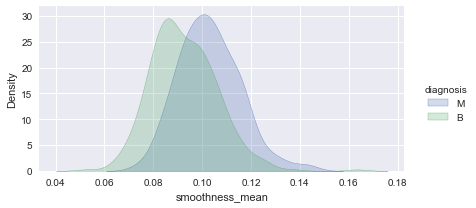

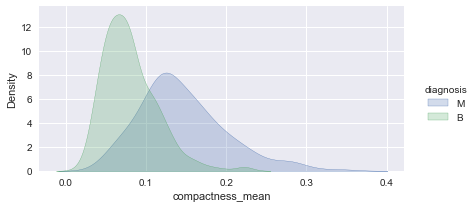

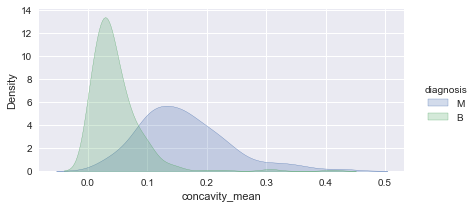

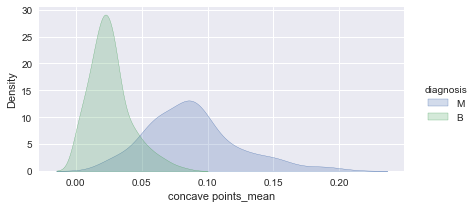

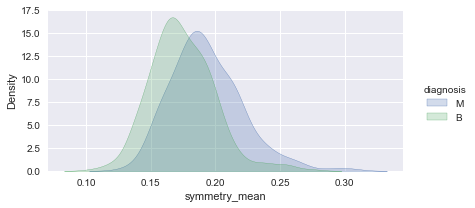

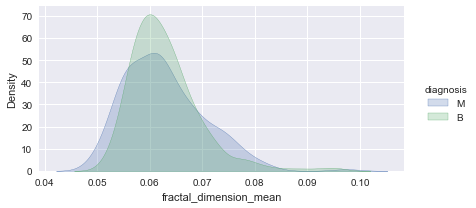

In [20]:
mean_col = [col for col in df.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue='diagnosis',aspect=2,margin_titles=True).map(sns.kdeplot,mean_col[i],shade=True).add_legend();

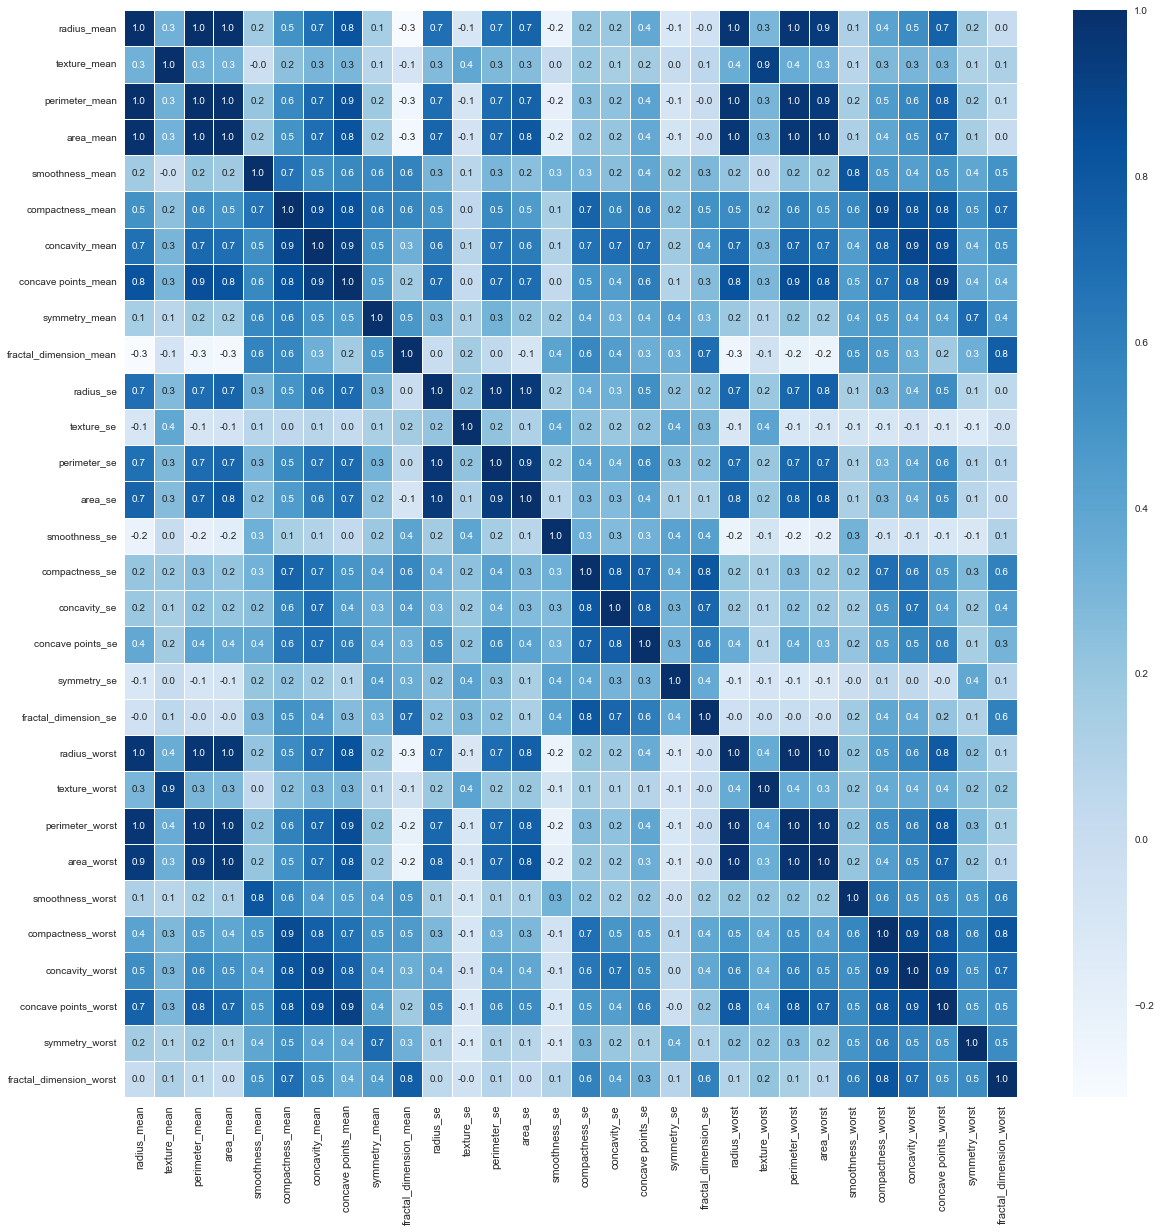

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidth=.5,fmt='.1f')
plt.xticks(fontsize=11,rotation=90);

- Parameter, Area, Radius are highly correlated
- compactness_mean, concavity_mean and concave points_mean are also highly correlated

#### Negatively Correlated:

- fractal_dimension_mean, radius_mean
- area_mean, fractal_dimension_mean
- smoothness_se, area_mean
- perimeter_mean, smoothness_se

#### Positively Corelated:

- perimeter_mean, raidus_worst
- area_mean, radius_worst
- texture_mean, texture_worst
- area_worst, radius_worst

#### Un-Correlated:
- smoothness_mean, texture_mean
- radius_mean, fractal_dimension_worst
- texture_mean, symmetry_mean
- texture_mean, symmetry_se

In [23]:
cols = ['radius_mean','area_mean','perimeter_mean',
       'smoothness_mean','texture_mean','symmetry_mean',
       'compactness_mean','concavity_mean','concave points_mean','diagnosis']
df[cols]

,radius_mean,area_mean,perimeter_mean,smoothness_mean,texture_mean,symmetry_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,17.99,1001.0,122.80,0.11840,10.38,0.2419,0.27760,0.30010,0.14710,M
1,20.57,1326.0,132.90,0.08474,17.77,0.1812,0.07864,0.08690,0.07017,M
2,19.69,1203.0,130.00,0.10960,21.25,0.2069,0.15990,0.19740,0.12790,M
3,11.42,386.1,77.58,0.14250,20.38,0.2597,0.28390,0.24140,0.10520,M
4,20.29,1297.0,135.10,0.10030,14.34,0.1809,0.13280,0.19800,0.10430,M
...,...,...,...,...,...,...,...,...,...,...
564,21.56,1479.0,142.00,0.11100,22.39,0.1726,0.11590,0.24390,0.13890,M
565,20.13,1261.0,131.20,0.09780,28.25,0.1752,0.10340,0.14400,0.09791,M
566,16.60,858.1,108.30,0.08455,28.08,0.1590,0.10230,0.09251,0.05302,M
567,20.60,1265.0,140.10,0.11780,29.33,0.2397,0.27700,0.35140,0.15200,M


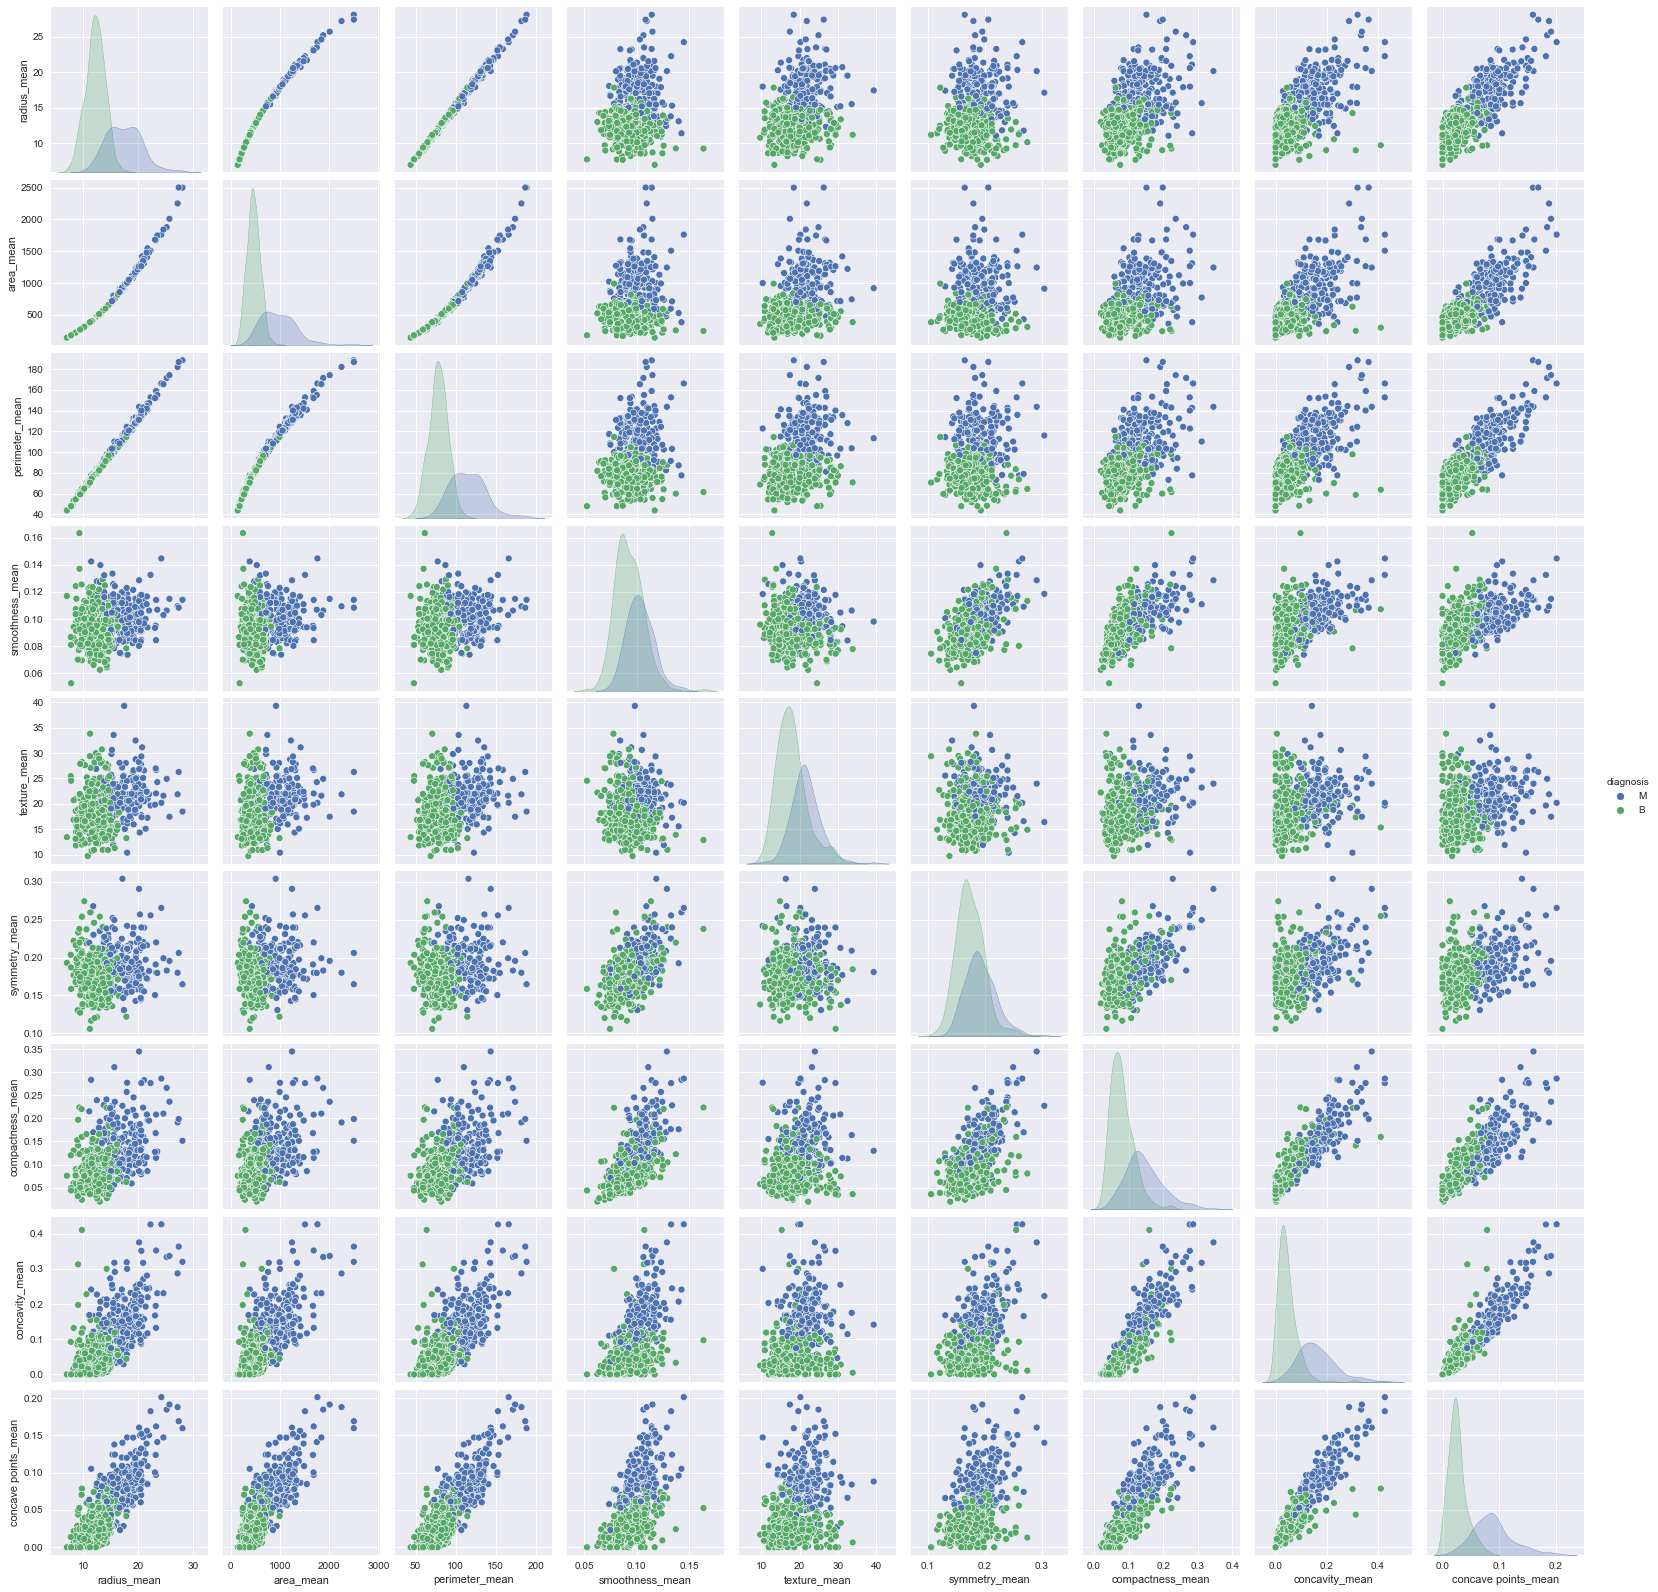

In [24]:
sns.pairplot(data=df[cols],hue='diagnosis');

### Positively Correlated Features

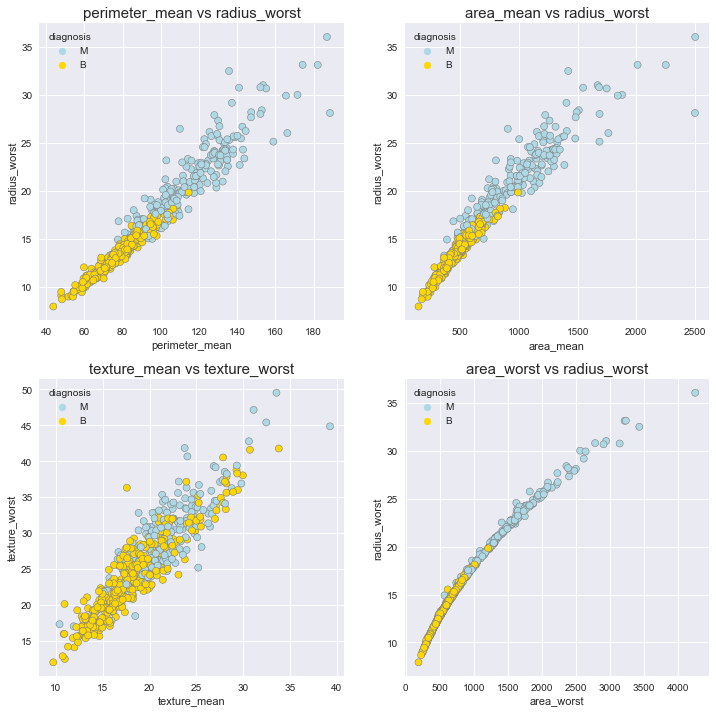

In [58]:
palette = {"M":'lightblue', "B":'gold'}
edgecolor='grey'
fig = plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x=df[a],y=df[b],hue='diagnosis',data=df,palette=palette,edgecolor=edgecolor)
    plt.title(a + " vs " + b, fontsize=15)
    k+=1

plot_scatter('perimeter_mean','radius_worst',221)
plot_scatter('area_mean','radius_worst',222)
plot_scatter('texture_mean','texture_worst',223)
plot_scatter('area_worst','radius_worst',224)

### Negatively Correlated Features

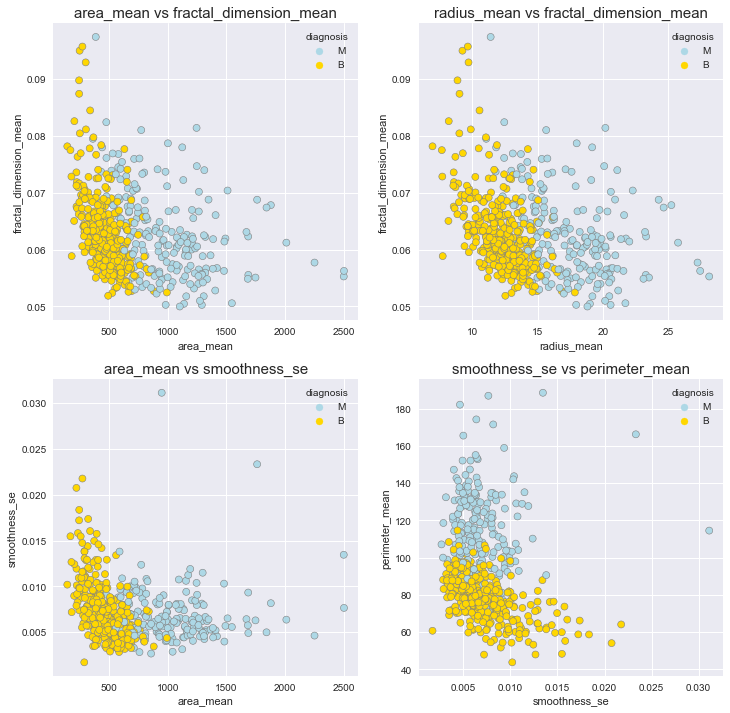

In [59]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

### Un-Correlated Features

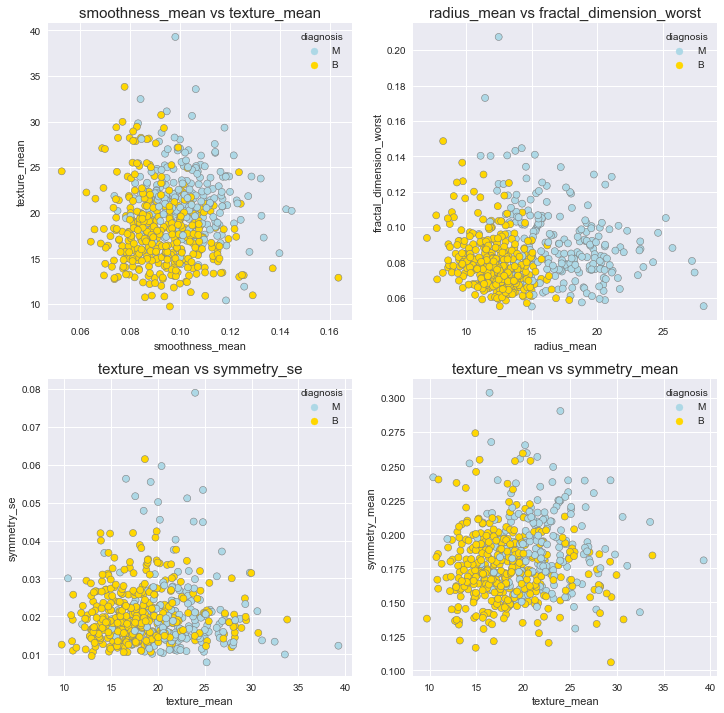

In [60]:
fig = plt.figure(figsize=(12,12))
plot_scatter('smoothness_mean','texture_mean',221)
plot_scatter('radius_mean','fractal_dimension_worst',222)
plot_scatter('texture_mean','symmetry_se',223)
plot_scatter('texture_mean','symmetry_mean',224)

In [ ]:
grp_map = {"M":1,"B":0}

df['diagnosis'] = df['diagnosis'].map(grp_map)

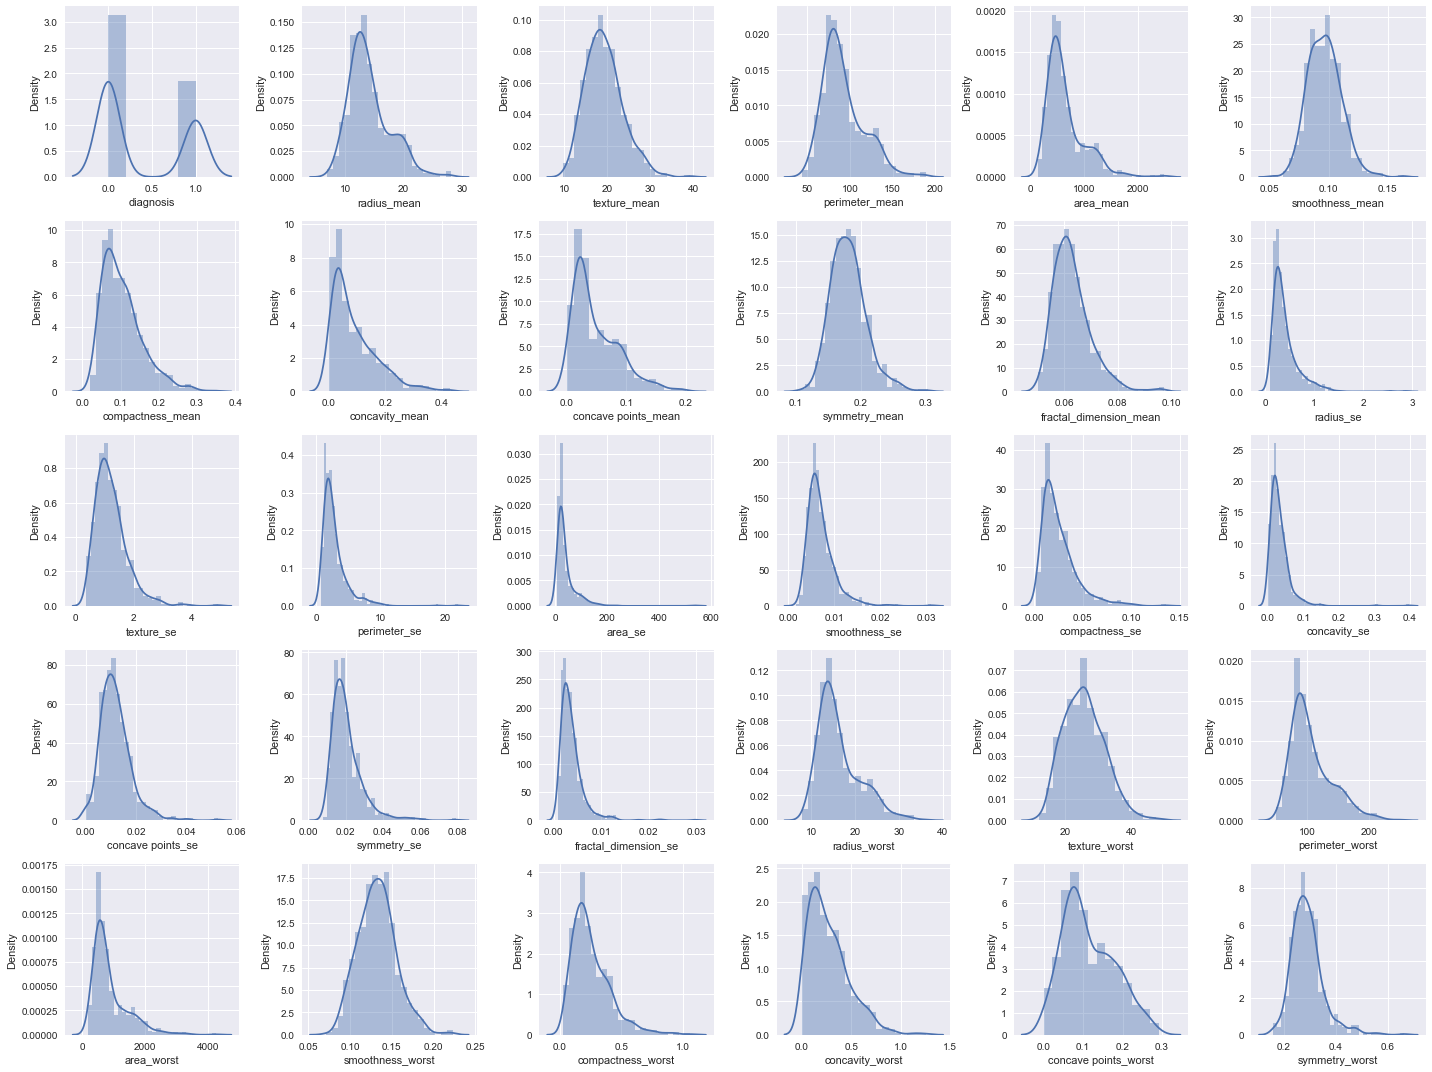

In [73]:
plt.figure(figsize=(20,15))
k=1

for column in df:
    if k<=30:
        ax = plt.subplot(5,6,k)
        sns.distplot(df[column])
        plt.xlabel(column)
    k+=1

    plt.tight_layout();

In [75]:
# removing highly correlated features

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr,dtype=bool))
tri_df = corr.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop,axis=1)
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 22), (171, 22), (398,), (171,))

In [78]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, r2_score

In [88]:
def scores(y_pred,y_test):
    print("Classification Report")
    print(classification_report(y_pred,y_test))
    print("Accuracy: ",accuracy_score(y_pred,y_test))
    print("R2 Score: ",r2_score(y_test,y_pred))
    print("ROC AUC Score: ",roc_auc_score(y_pred,y_test))

In [89]:
def pred_true_label(y_pred,y_test):
    print('Actual Label   : ',list(y_test[10:20]))
    print('Predicted Label: ',list(y_pred[10:20]))

In [143]:
def conf_mat(y_pred,y_test):
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred))
    fig, ax = plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d', annot_kws={'size': 15,"weight":"bold"},cbar=False)
    ax.set_ylabel("Predicted", fontsize = 25)
    ax.set_xlabel("Actual", fontsize = 25);

## Logistic Regression

In [91]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [92]:
y_pred = log_reg.predict(X_test)

In [93]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Predicted Label:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix
[[106   1]
 [  1  63]]


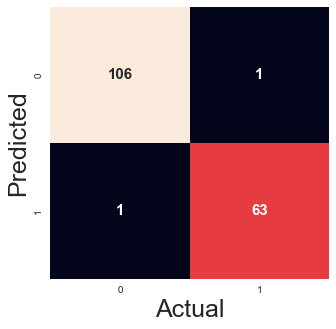

In [94]:
conf_mat(y_pred,y_test)

In [95]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       0.98      0.98      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuracy:  0.9883040935672515
R2 Score:  0.9500584112149533
ROC AUC Score:  0.9875146028037384


In [168]:
log_reg_acc = '98.88%'

## K Negighbors Classifier

In [96]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [97]:
y_pred = knn.predict(X_test)

In [98]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Predicted Label:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix
[[106   8]
 [  1  56]]


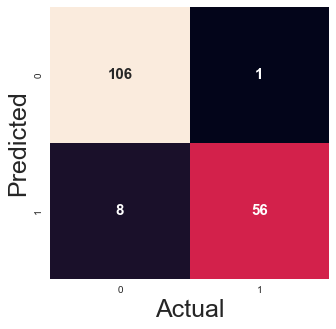

In [99]:
conf_mat(y_pred,y_test)

In [100]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       114
           1       0.88      0.98      0.93        57

    accuracy                           0.95       171
   macro avg       0.93      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy:  0.9473684210526315
R2 Score:  0.7752628504672897
ROC AUC Score:  0.956140350877193


In [169]:
knn_acc = '94.73%'

## Support Vector Classifier 

In [107]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
parameters = {
    'gamma' : [0.0001,0.001,0.01,0.1],
    'C' : [0.01,0.05,0.5,0.1,1,10,15,20]
}
grid_search = GridSearchCV(svc,parameters)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [108]:
grid_search.best_params_

{'C': 15, 'gamma': 0.001}

In [109]:
grid_search.best_score_

0.9698101265822784

In [110]:
svc = SVC(gamma = 0.001,C=15)
svc.fit(X_train,y_train)

SVC(C=15, gamma=0.001)

In [111]:
y_pred = svc.predict(X_test)

In [112]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Predicted Label:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix
[[106   5]
 [  1  59]]


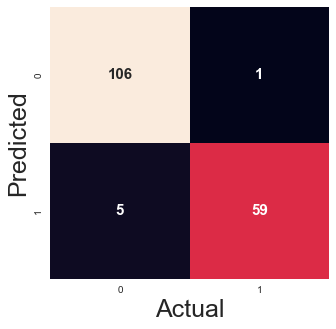

In [113]:
conf_mat(y_pred,y_test)

In [114]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy:  0.9649122807017544
R2 Score:  0.8501752336448598
ROC AUC Score:  0.9691441441441442


In [170]:
svc_acc = '96.49%'

## Decision Tree Classifier

In [117]:
%%time
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

params = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dtc = GridSearchCV(dtc,params,cv=5,verbose=True,n_jobs=-1)
grid_search_dtc.fit(X_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
Wall time: 18.1 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=True)

In [118]:
grid_search_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'splitter': 'random'}

In [119]:
grid_search_dtc.best_score_

0.9623101265822784

In [120]:
dtc = DecisionTreeClassifier(criterion='entropy',
                            max_depth=9,
                            min_samples_leaf=2,
                            min_samples_split=8,
                            splitter='random')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=8, splitter='random')

In [121]:
y_pred = dtc.predict(X_test)

In [122]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Predicted Label:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix
[[104   7]
 [  3  57]]


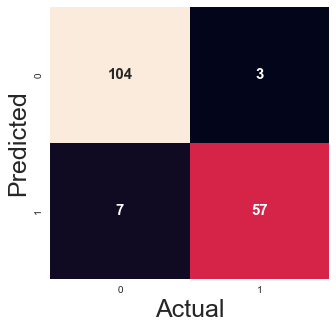

In [123]:
conf_mat(y_pred,y_test)

In [124]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       111
           1       0.89      0.95      0.92        60

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy:  0.9415204678362573
R2 Score:  0.7502920560747663
ROC AUC Score:  0.9434684684684684


In [171]:
dtc_acc = '94.15%'

## Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

'''rf = RandomForestClassifier()
params = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'n_estimators':range(40,200,10),
    'max_features':['auto']
    
}
grid_search_rf = GridSearchCV(rf,params,cv=5,verbose=True,n_jobs=-1)
grid_search_rf.fit(X_train,y_train)'''

"rf = RandomForestClassifier()\nparams = {\n    'criterion':['gini','entropy'],\n    'max_depth':range(2,32,1),\n    'min_samples_leaf':range(1,10,1),\n    'min_samples_split':range(2,10,1),\n    'n_estimators':range(40,200,10),\n    'max_features':['auto']\n    \n}\ngrid_search_rf = GridSearchCV(rf,params,cv=5,verbose=True,n_jobs=-1)\ngrid_search_rf.fit(X_train,y_train)"

In [133]:
rfc = RandomForestClassifier(criterion='entropy',max_depth=11,max_features='auto',min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [134]:
y_pred = rfc.predict(X_test)

In [135]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Predicted Label:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix
[[107   5]
 [  0  59]]


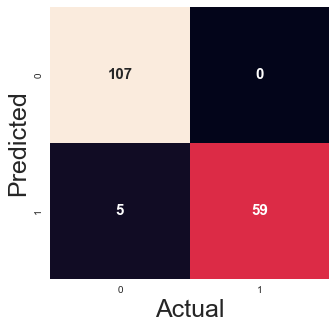

In [136]:
conf_mat(y_pred,y_test)

In [137]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.92      1.00      0.96        59

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy:  0.9707602339181286
R2 Score:  0.8751460280373832
ROC AUC Score:  0.9776785714285715


In [138]:
rfc_acc = '97.07%'

## Ada Boost Classifier

In [139]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=dtc)
ada = AdaBoostClassifier(dtc,n_estimators = 180)
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=9,
                                                         min_samples_leaf=2,
                                                         min_samples_split=8,
                                                         splitter='random'),
                   n_estimators=180)

In [140]:
y_pred = ada.predict(X_test)

In [141]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Predicted Label:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix
[[107   0]
 [  2  62]]


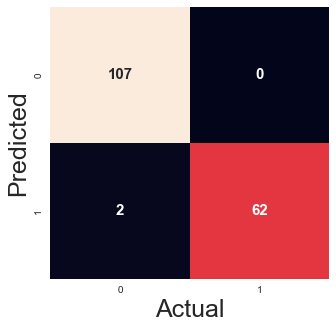

In [144]:
conf_mat(y_pred,y_test)

In [145]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       109
           1       0.97      1.00      0.98        62

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Accuracy:  0.9883040935672515
R2 Score:  0.9500584112149533
ROC AUC Score:  0.9908256880733946


In [172]:
ada_acc = '98.88%'

## Gradient Boosting Classifier 

In [147]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

params = {
    'loss': ['deviance','exponential'],
    'learning_rate':[0.001,0.01,1,10],
    'n_estimators':[100,150,180,200]
}

grid_search_gbc = GridSearchCV(gbc,params,cv=5,n_jobs=-1,verbose=True)
grid_search_gbc.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Wall time: 13.9 s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=True)

In [148]:
grid_search_gbc.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}

In [149]:
grid_search_gbc.best_score_

0.9621835443037975

In [150]:
gbc = GradientBoostingClassifier(learning_rate=1, loss='exponential',n_estimators=100)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, loss='exponential')

In [151]:
y_pred = gbc.predict(X_test)

In [152]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Predicted Label:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix
[[107   0]
 [  6  58]]


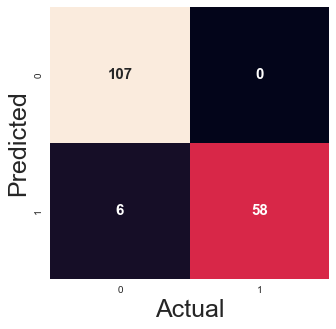

In [153]:
conf_mat(y_pred,y_test)

In [154]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       113
           1       0.91      1.00      0.95        58

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy:  0.9649122807017544
R2 Score:  0.8501752336448598
ROC AUC Score:  0.9734513274336284


In [173]:
gbc_acc = '96.49%'

## Extreme Gradient Boosting

In [159]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.5,max_depth=5,n_estimators=180)
xgb.fit(X_train,y_train)

[02:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
y_pred = xgb.predict(X_test)

In [161]:
pred_true_label(y_pred,y_test)

Actual Label   :  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Predicted Label:  [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


Confusion Matrix
[[107   0]
 [  5  59]]


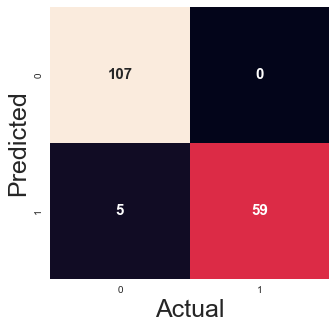

In [162]:
conf_mat(y_pred,y_test)

In [163]:
scores(y_pred,y_test)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.92      1.00      0.96        59

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy:  0.9707602339181286
R2 Score:  0.8751460280373832
ROC AUC Score:  0.9776785714285715


In [166]:
xgb_acc = '97.07%'

In [174]:
models = pd.DataFrame({
    'Model':['Logistic Regression','KNN','SVC','Decision Tree','Random Forest','Ada Boost',
             'Gradient Boosting Classifier','XGBoosting Classifier'],
    'Score':[log_reg_acc,knn_acc,svc_acc,dtc_acc,rfc_acc,ada_acc,gbc_acc,xgb_acc]})

models.sort_values(by='Score',ascending=False)

,Model,Score
0,Logistic Regression,98.88%
5,Ada Boost,98.88%
4,Random Forest,97.07%
7,XGBoosting Classifier,97.07%
2,SVC,96.49%
6,Gradient Boosting Classifier,96.49%
1,KNN,94.73%
3,Decision Tree,94.15%


## Best model to diagnosing breast cancer with accuracy:

- Logistic Regression - 98.88%
- Ada Boost Classifier - 98.88%